<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Supervised_learning_Classification_with_KNN_Iris_dataset_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised learning - Classification with KNN - Iris dataset
Prediction of the class of Iris flower with the KNN classifier with scikit-learn.  

---

This is a tutorial for beginners aiming to improve their Machine Learning' skills.

### Objectives


Build a KNN classifier for predicting the class of a Iris flower based on their features.  

Flower features are considered as the following :
- `sepal_length`,
- `sepal_width`,
- `petal_length`,
- `petal_width`

These features (called `X` also) are used to predict the target `species` (called `y` also) : class of Iris flower.

Classifier is built following a classical Machine Learning workflow (for expert practitioners, the workflow should be more complete).
* Explore data
* Preprocess data
* Build model
* Evaluate model
* Conclusions  

What is that KNN Classifier ???? [Démo](https://codepen.io/gangtao/pen/PPoqMW)

## 1. Librairies
As usual, some useful libraries ...

`scikit-learn` is called later.

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

## 2. Data

Download dataset from an URL (github repo).  
Iris flower dataset is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936 [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [45]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


First exploration and describing.

In [46]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Graphical exploration

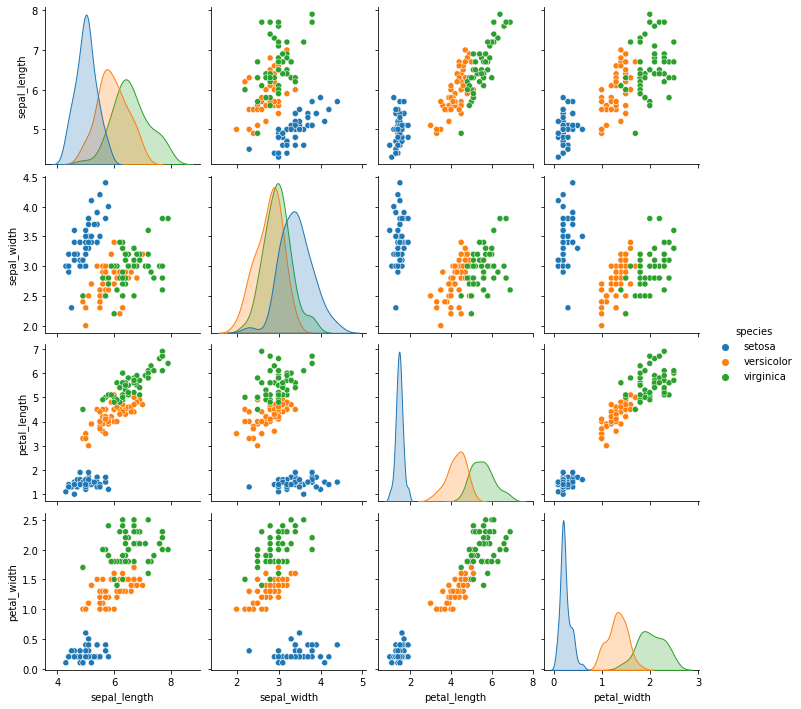

In [49]:
sns.pairplot(data=df, hue='species')

3D Graphical exploration

In [50]:
import plotly.express as px
fig = px.scatter_3d(df, x="sepal_length", y="petal_width", z="petal_length", hover_name="species", color="species", width=800, height=500)
fig.show()

## 3. Preprocessing

### 3.1. Encoding
This part is essential for our problem and considering the type of data we have.  
LabelEncoder : we should encode target labels with value between 0 and n_classes-1.([sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)).

In [51]:
# Load module from scikit-learn
from sklearn.preprocessing import LabelEncoder

In [52]:
# Define features data (X)
X = df[['sepal_length',	'petal_width', 'sepal_width',	'petal_length']]

In [53]:
# Define target data (y)
y = df['species']

In [54]:
# Visualise data before encoding
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [55]:
# Initialise the encoder
label_encod = LabelEncoder()

In [56]:
# Apply encoder on target data
y = label_encod.fit_transform(y)

In [57]:
# Visualise encoded data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3.2. Train-test-split 
For supervised learning, we need : 
- a train set for learning step,
- a test set for evaluating the algorithm.

So train-test-split consists in splitting the whole data into two sub datasets : train & test.

In [58]:
# Load module from scikit-learn
from sklearn.model_selection import train_test_split

In [59]:
# Split data into 2 parts : train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
# Check the size of subset of data
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 150
The length of the train dataset is   : 112
The length of the test dataset is    : 38


In [61]:
# Visualise X_train data
X_train

,sepal_length,petal_width,sepal_width,petal_length
4,5.0,0.2,3.6,1.4
32,5.2,0.1,4.1,1.5
142,5.8,1.9,2.7,5.1
85,6.0,1.6,3.4,4.5
86,6.7,1.5,3.1,4.7
...,...,...,...,...
71,6.1,1.3,2.8,4.0
106,4.9,1.7,2.5,4.5
14,5.8,0.2,4.0,1.2
92,5.8,1.2,2.6,4.0


In [62]:
# Visualise y_train data
y_train

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

## 4. Build model

We are going to build a Classifier model by appying : 
- Initialisation step,
- Fitting step,
- Prediction.

In [63]:
# Load module from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [64]:
# Initialisation with the choice of k = 3
KNN_classifier = KNeighborsClassifier(n_neighbors=3)

In [65]:
# Let see the initialised model
KNN_classifier

KNeighborsClassifier(n_neighbors=3)

In [66]:
# Fitting the model
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
# Let see the train model
KNN_classifier

KNeighborsClassifier(n_neighbors=3)

In [68]:
# Predicting
prediction = KNN_classifier.predict(X_test)

In [69]:
# Let see the prediction
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [70]:
# Let see the reality
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

## 5. Evaluate model

Accuracy and confusion matrix are 2 must-to-know metrics for classification model evaluation.

In [71]:
# Load module from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score

In [72]:
# Compute the accuracy (in %)
accuracy = accuracy_score(y_test, prediction)*100

In [73]:
# Let's see the global performance
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [74]:
# Compute the matrix of confusion
confusion_matrix(y_test, prediction)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

For a better readability, let's plot the matrix !

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



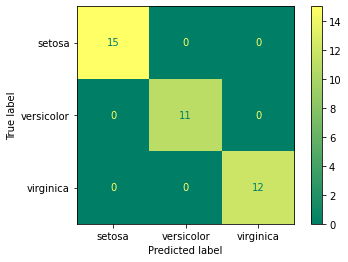

In [75]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN_classifier, X_test, y_test,
                                 display_labels=['setosa', 'versicolor', 'virginica'],
                                 cmap=plt.cm.summer, # other color palettes : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                                 normalize=None)

## 6. Perspectives
This example is a typical case of supervised learning. All steps are needed but they could be extended with :
- Preprocessing : standardise quantitative data, encoding qualitative data
- Modeling : use cross validation to tune hyperparameters
- Evaluation : use special metrics
- ...

## 7. Conclusions

* The KNN classification is an easy-to-use machine learning algorithm.
* Based on our dataset, performances of our model are good enough to predict class of Iris with satisfying confidence.